# ISHIKA SACHDEV
TASK3
Exploratory Data Analysis of a Retail Store
    -To know profit making and weak areas
    -Business Suggestions

In [9]:
#importing necessary modules
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
#reading the data
df=pd.read_csv("SampleSuperStore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [21]:
#to get total countries
df['Country'].unique()

array(['United States'], dtype=object)

In [22]:
#total number of states
df['State'].nunique()

49

In [23]:
#no. of cities
df['City'].nunique()

531

In [17]:
#category products involved in the dataset
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [18]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [19]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [32]:
#basic statistical analysis
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [23]:
#checking and removing duplicates
df.duplicated().sum()

17

In [6]:
df=df.drop_duplicates()

In [7]:
#deleting non-useful column
del df['Postal Code']

In [27]:
df

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


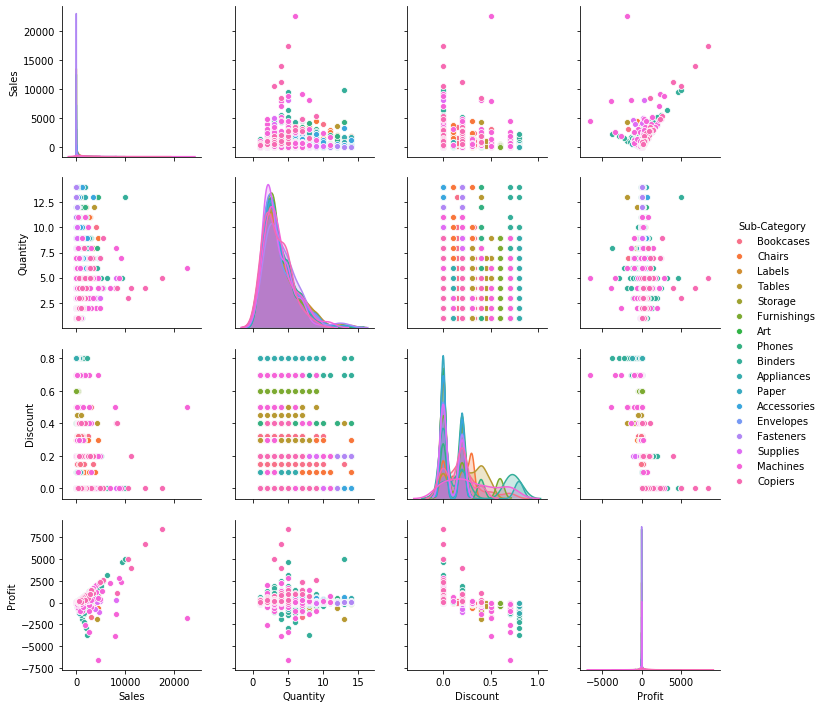

In [15]:
#correlation graph
sns.pairplot(df,hue='Sub-Category')

In [28]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


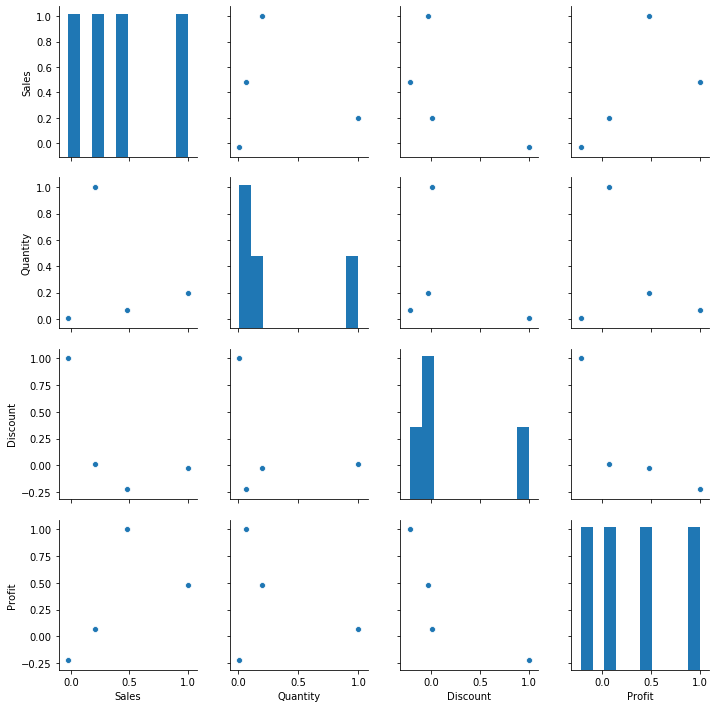

In [29]:
sns.pairplot(df.corr())

In [45]:
#covariance of the numerical attributes
df.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


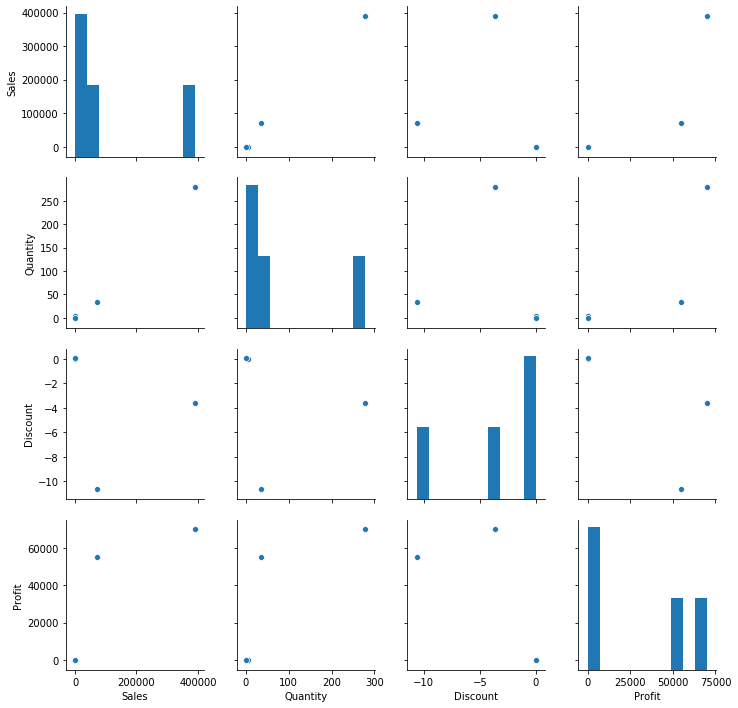

In [47]:
sns.pairplot(df.cov())

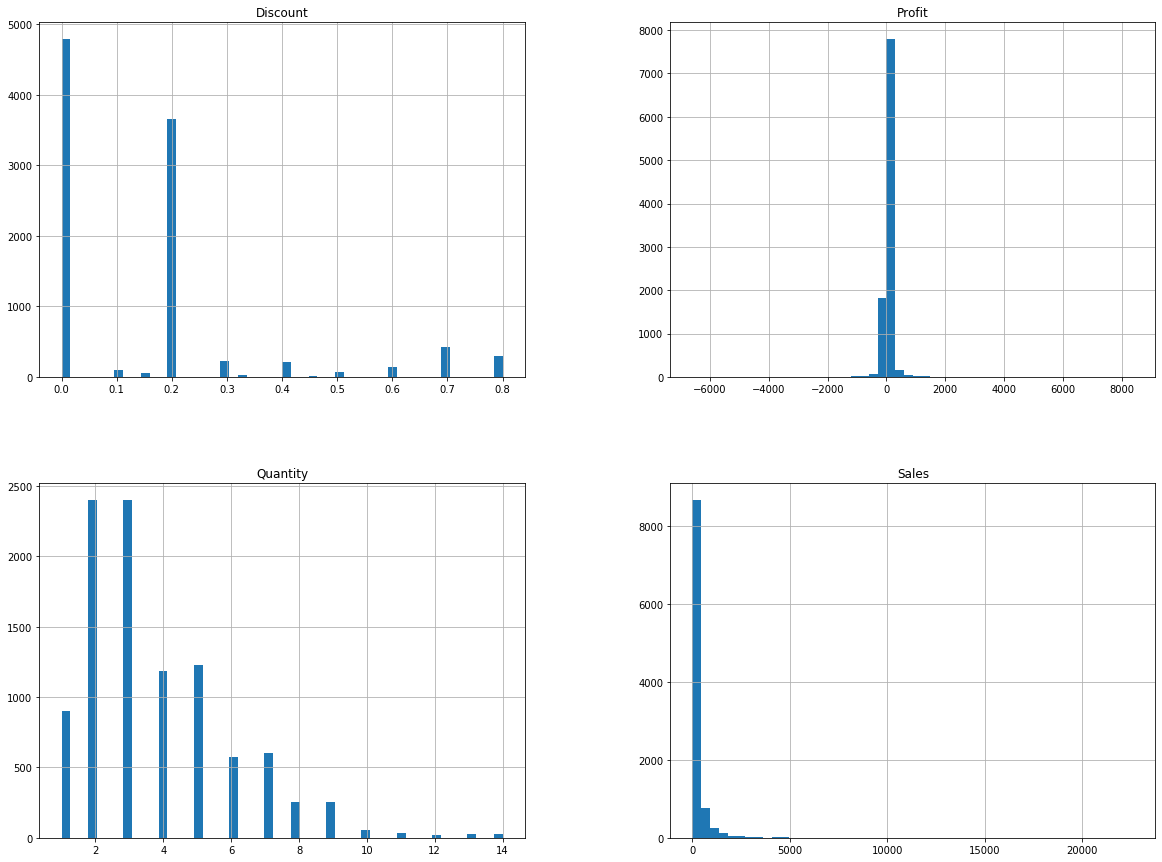

In [51]:
#histogram representation of numerical attributes 
#can be compared
df.hist(bins=50 ,figsize=(20,15))
plt.show();

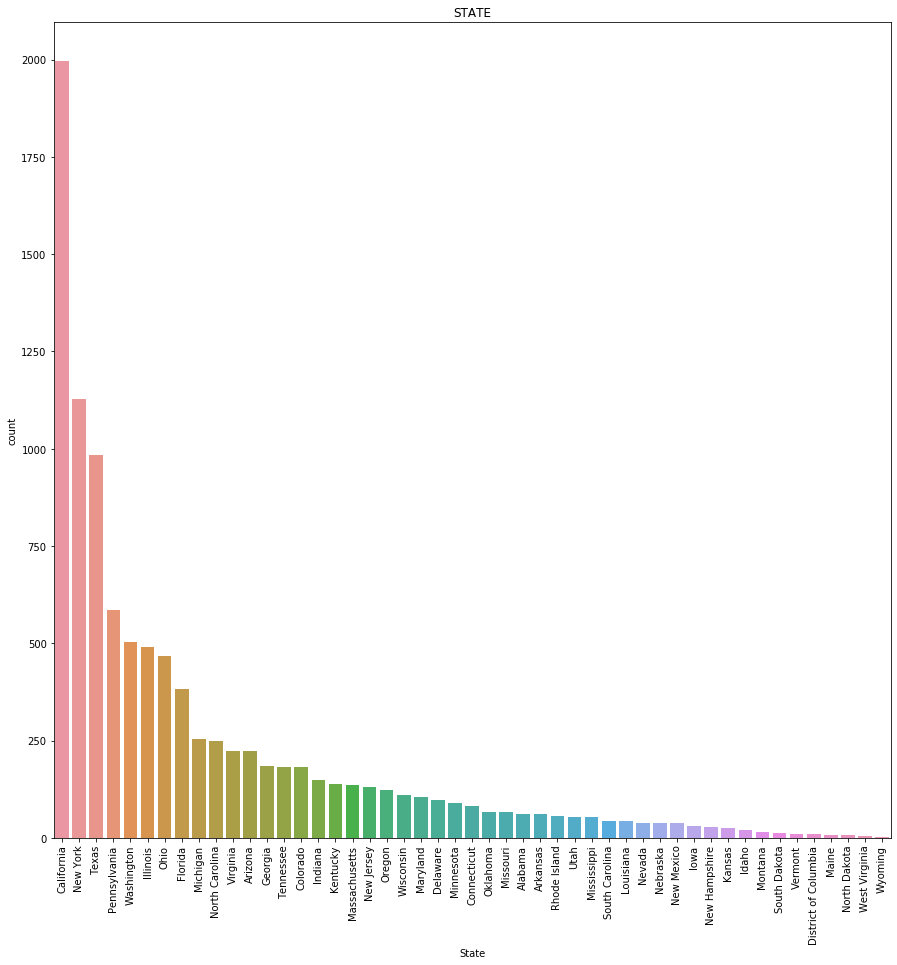

In [53]:
#count of states in our data
plt.figure(figsize=(15,15))
sns.countplot(x=df['State'],order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

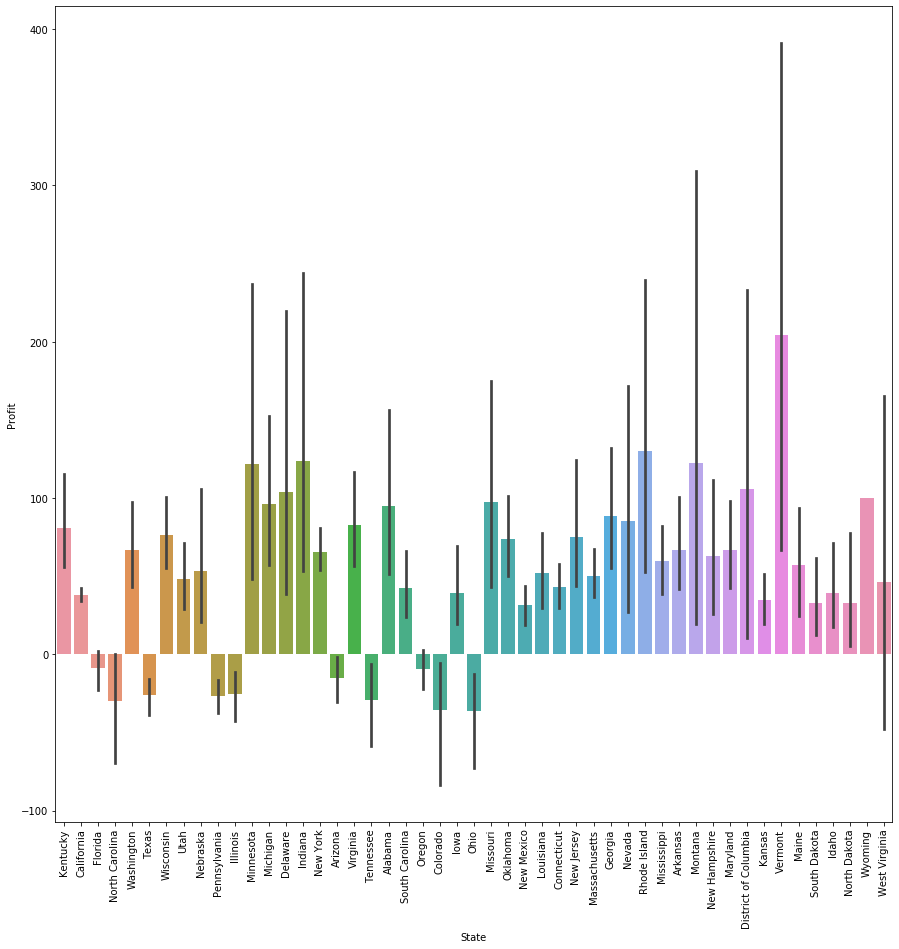

In [25]:
#state-wise profit 
plt.figure(figsize=(15,15))
sns.barplot(x='State',y='Profit',data=df)
plt.xticks(rotation=90)
plt.show()

In [35]:
df.sort_values(['Profit'])

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
9039,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4190,Standard Class,Consumer,United States,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
8153,First Class,Consumer,United States,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808


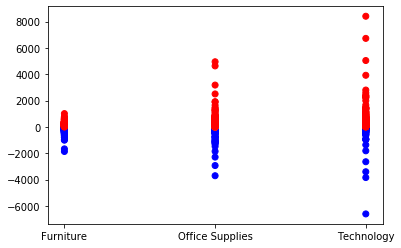

In [41]:
#visualize the amount of profit and loss for each category
plt.scatter(x=df['Category'],y=df['Profit'],c=np.sign(df['Profit']),cmap='bwr')
#technology suffers the most with outliers and also records for the maximum profit making area
#business can pay more attention to furniture and office supplies

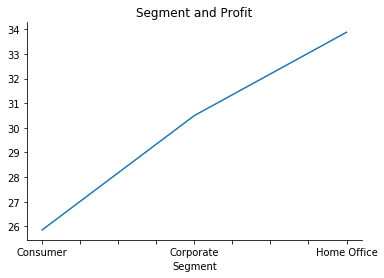

In [49]:
#mean of profits in each segment
df.groupby(["Segment"]).mean()["Profit"].plot.line(title="Segment and Profit")
sns.despine()
#consumer segment needs more attention

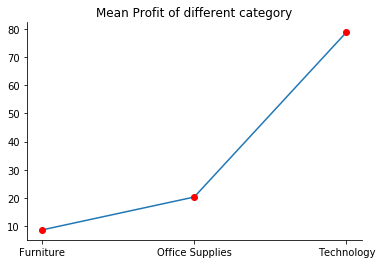

In [54]:
x=df.groupby(["Category"]).mean()[["Profit"]].index
y=df.groupby(["Category"]).mean()[["Profit"]].values
z=df.groupby(["Category"]).mean()[["Profit"]].values
plt.plot(x,y,z,"ro")
plt.xticks(x,["Furniture","Office Supplies","Technology"])
plt.title("Mean Profit of different category")
sns.despine()

In [30]:
#counting the data
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [31]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [32]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [33]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [34]:
#grouping the data to konw profit for each sub-category
df.groupby(['Category','Sub-Category']).count()[['Profit']]
#binders profit is the maximum and copiers is the least

Profit
Category        Sub-Category        
Furniture       Bookcases        228
                Chairs           615
                Furnishings      956
                Tables           319
Office Supplies Appliances       466
                Art              795
                Binders         1522
                Envelopes        254
                Fasteners        217
                Labels           363
                Paper           1359
                Storage          846
                Supplies         190
Technology      Accessories      775
                Copiers           68
                Machines         115
                Phones           889

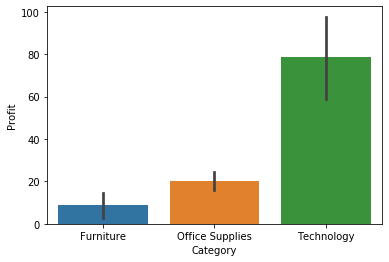

In [58]:
#Category vs Profit
sns.barplot(x='Category',y='Profit',data=df)

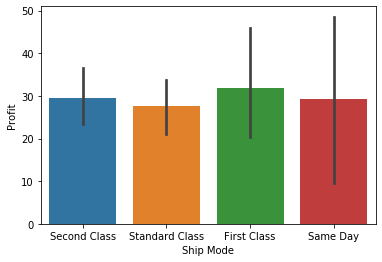

In [36]:
#Ship Mode vs Profit
sns.barplot(x='Ship Mode',y='Profit',data=df)

In [37]:
#statistical analysis for profit
df.groupby(['Category','Sub-Category']).agg({"Profit":["mean","std","count","min","max"]})

Profit                                \
                                    mean          std count        min   
Category        Sub-Category                                             
Furniture       Bookcases     -15.230509   182.034224   228 -1665.0522   
                Chairs         43.198582   127.286845   615  -630.8820   
                Furnishings    13.653476    52.780322   956  -427.4500   
                Tables        -55.565771   230.565006   319 -1862.3124   
Office Supplies Appliances     38.922758   148.319146   466 -1181.2824   
                Art             8.207059    13.391501   795     0.1533   
                Binders        19.860710   306.296682  1522 -3701.8928   
                Envelopes      27.418019    35.354983   254     0.5508   
                Fasteners       4.375660     5.055053   217   -11.8256   
                Labels         15.224193    34.130300   363     0.6786   
                Paper          24.977365    35.338387  1359     1.0700   
                Storage        25.152277    81.923600   846  -337.8060   
                Supplies       -6.258418   105.059628   190 -1049.3406   
Technology      Accessories    54.111788   106.155455   775   -75.5958   
                Copiers       817.909190  1460.921156    68    59.9980   
                Machines       29.432669  1099.070067   115 -6599.9780   
                Phones         50.073938   113.251277   889  -386.3916   

                                         
                                    max  
Category        Sub-Category             
Furniture       Bookcases     1013.1270  
                Chairs         770.3520  
                Furnishings    387.5676  
                Tables         629.0100  
Office Supplies Appliances     793.7160  
                Art            112.5740  
                Binders       4946.3700  
                Envelopes      204.0714  
                Fasteners       21.8880  
                Labels         385.3752  
                Paper          352.2960  
                Storage        792.2691  
                Supplies       327.5060  
Technology      Accessories    829.3754  
                Copiers       8399.9760  
                Machines      2799.9840  
                Phones        1228.1787

In [38]:
df[df['Profit']==min(df['Profit'])]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,East,Technology,Machines,4499.985,5,0.7,-6599.978


In [39]:
df[df['Profit']==max(df['Profit'])]
#discount can be added to maximise sales

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,Central,Technology,Copiers,17499.95,5,0.0,8399.976


In [40]:
df[df['Sales']==min(df['Sales'])]

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,Consumer,United States,Houston,Texas,Central,Office Supplies,Appliances,0.444,1,0.8,-1.11


In [41]:
df[df['Sales']==max(df['Sales'])]
#discount should be reduced as loss has occurred

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,South,Technology,Machines,22638.48,6,0.5,-1811.0784


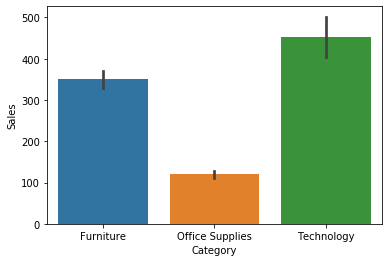

In [43]:
#category vs sales
sns.barplot(x='Category',y='Sales',data=df)

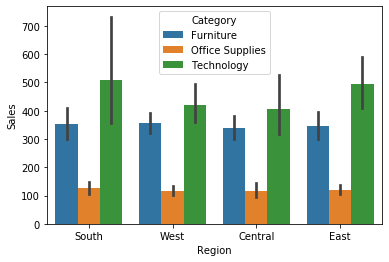

In [44]:
#Region and Category vs Sales
sns.barplot(x='Region',y='Sales',hue='Category',data=df)
#technology rules.. and most in the south region

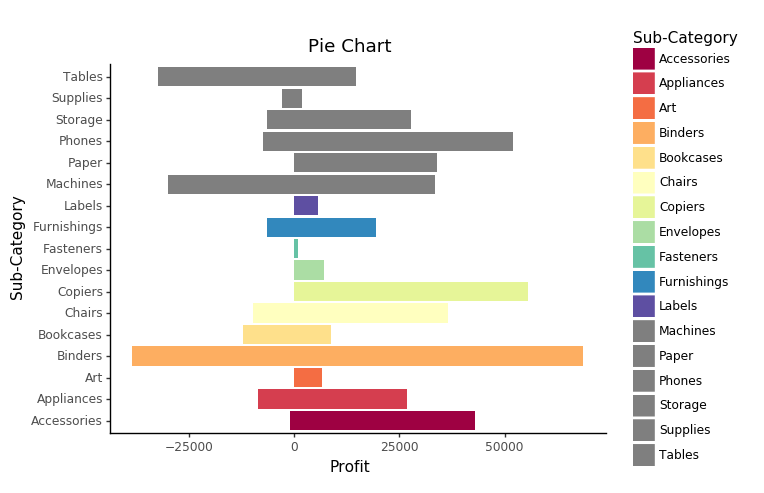

<ggplot: (-9223371902703029252)>

In [14]:
#profit range for each sub-Category
profit_plot = (ggplot(df, aes(x='Sub-Category', y='Profit',fill='Sub-Category')) + geom_col() + coord_flip()
+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))

display(profit_plot)

Discounts can be given more in the office supplies to increase the sales and the profit
Nevertheless, binders make more profits but they also suffer the most loss.
Central Region can apply some flexibility in price to increase the sales.
First Class ship mode makes deliveries fast and thus more sales and profits.. Companies can make investments in this sector.

Thankyou!